<a href="https://colab.research.google.com/github/jittakorn-ch/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [1]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [2]:
Name = 'จิตรกร จันทะสี'
ID = '623021044-1'

In [3]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [4]:
Data = DataGenerator(Name,ID)

021:22:11


In [5]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-0.889351,-3.687852,5.854784,-3.415873,-5.610665,-2.582173,3.694650,-5.062654,-4.586200,6.457132,2.304650,4.329046,7.206710,-5.144610,-1.245484,-7.250447,9.249019,4.797001,5.020432,-3.889117,8.994408,-11.231579,-7.375703,-54.157893
1,6.888596,-6.324905,-5.740092,5.299575,-2.842515,2.372734,7.933971,-9.659946,6.361068,-10.214856,0.338380,-1.412124,3.624184,4.602672,-8.628475,-7.482172,-0.471848,5.111467,-7.731085,2.441740,-7.366802,-1.858061,-12.649810,-7.290306
2,8.017362,8.473604,3.038962,-6.893468,-7.191756,-2.181812,-8.602517,1.635662,-4.501795,-8.114539,-6.316734,-4.982942,1.302537,-2.022844,0.086704,-2.306383,-8.802485,-6.781084,-3.476832,-4.668904,-9.690799,5.240675,16.947207,28.203376
3,-5.259314,7.534503,7.437431,4.414411,-0.059253,-7.445860,-4.424710,-3.564299,-3.465228,-0.862653,2.011504,-4.724475,6.885026,4.804179,7.909228,-4.198045,4.079989,2.923757,-2.001206,-2.269056,6.894771,1.137825,15.069006,7.689124
4,11.803001,-5.373877,-6.309848,5.999780,-2.165905,3.767224,8.701775,-8.471486,5.789175,-9.041266,0.967662,-0.752092,4.443130,3.572116,-9.602990,-7.327553,2.603626,3.287083,-6.879058,1.562324,-6.132335,-0.672218,-10.747753,-1.361092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.386310,0.143661,7.034918,8.043940,6.736725,6.999241,4.103643,-2.564332,-3.517837,6.354337,-7.514451,-2.221127,-5.829928,2.024862,6.591702,-3.938688,6.786948,5.749472,2.184205,-5.268825,6.337545,-0.350062,0.287322,0.249688
9996,-5.933911,7.865360,7.554697,5.966666,-0.086257,-5.588988,-3.534003,-2.527750,-4.761734,-0.426129,1.003535,-6.136890,5.449768,3.955082,6.685563,-6.451825,3.396171,3.630983,-1.397212,-3.044932,5.194200,1.544812,15.730721,9.724062
9997,-9.191507,-5.048968,4.294216,-9.342154,-7.362920,-9.229852,-4.192468,3.754275,-2.734278,4.230375,-9.031066,7.426534,-6.797743,-5.650139,2.036746,8.826735,5.432167,9.468526,6.800718,-1.900056,-3.067357,3.287883,-10.097935,18.439417
9998,-2.169208,11.419935,-5.335483,3.089792,8.711882,6.311260,-4.494053,11.339766,-1.473491,10.446842,-9.495673,9.596118,5.562927,-7.996054,4.785754,-5.670202,1.141286,0.046121,-7.345678,5.898585,8.302183,2.210728,22.839871,13.053641


## K-mean

ทำ K-mean เพื่อแบ่งกลุ่มข้อมุล

### Import

In [6]:
from sklearn.cluster import KMeans           ### import KMeans จาก Packages sklearn

### Define

In [7]:
kmeans = KMeans(random_state=1313)        ### กำหนดให้ KMeans เริ่มสุ่มที่จุด 1313 

### Fit-tranform

In [8]:
kmeans.fit(Data)          ### คำนวณหา จุด cluster centers ของข้อมูล Data ด้วยวิธี K-means clustering

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1313, tol=0.0001, verbose=0)

In [9]:
kmeans.cluster_centers_      ### แสดง จุด cluster centers ที่คำนวณออกมาได้    ### จะมี 8 กลุ่มตามค่า default ของ KMeans

array([[ 7.99878169e-01, -4.13327576e+00, -2.61121470e+00,
        -4.63424571e+00, -8.14523499e+00,  5.04060677e+00,
         4.64575823e+00, -9.89875880e+00, -5.23545328e+00,
        -4.59016345e+00,  5.83404448e+00,  1.23782137e-01,
        -7.07781395e-01, -4.76360664e+00,  2.10403771e+00,
         7.55216488e+00,  9.83123863e+00, -9.43608580e+00,
         4.58543183e-01, -9.16352277e+00,  6.91082925e+00,
         2.77306995e+00, -8.26655151e+00,  1.58653498e+01],
       [ 8.77937711e+00,  3.33697678e+00,  5.16330468e+00,
         3.22868710e+00,  7.01977676e+00,  6.22551454e+00,
        -3.00544074e+00,  1.30543503e+00, -1.13929025e+00,
         3.03895574e+00, -4.27975902e+00, -2.34884745e+00,
        -4.85295342e+00,  3.61541849e+00,  6.05407544e+00,
        -5.05756662e+00,  5.63730766e+00,  5.83636917e+00,
         4.02906192e+00, -5.32069353e+00,  1.44726987e+00,
        -2.58214311e+00,  6.67395356e+00, -1.09107156e+01],
       [-5.47906040e-01,  3.09021987e+00,  4.48192488e

In [10]:
test = kmeans.predict(Data)           ### ทดสอบการจัดกลุ่มของข้อมูลด้วยการทำ K-mean        ### ดูว่าจุดไหนอยู่กลุ่มไหน
test

array([5, 6, 7, ..., 3, 4, 4], dtype=int32)

## ทำ PCA 

เพื่อลดจำนวน Dimension ของข้อมูลให้เหลือ 2 Dimension เพื่อพล็อตกราฟ

In [11]:
from sklearn.decomposition import PCA             ### import PCA จาก sklearn

pca = PCA(n_components=2)                         ### กำหนดให้มี 2 dimension

new_pca = pca.fit_transform(Data)                 ### คำนวณ PCA

## Plot กราฟ

In [12]:
from matplotlib import pyplot as plt              ### import pypplot จาก matplotlib    

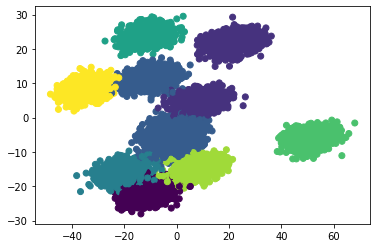

In [14]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=test)        ### พล็อตกราฟของ new_pca โดยกำหนดสีตาม test(test คือ กลุ่มของข้อมูลจากการทำ K-mean) 

## หาว่าควรมีกี่กลุ่ม หรือ ค่า K ควรจะเป็นเท่าไหร่

### **Elbow Method**

SSE

In [15]:
kmeans.inertia_                      ## SSE (Sum of Squared Errors)

2063455.4084842256

In [17]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
  kmeans = KMeans(n_clusters=k, random_state=1313)
  kmeans.fit(Data)
  SSE.append(kmeans.inertia_)

In [18]:
SSE

[11957322.79958456,
 8702497.21684175,
 7022215.316135556,
 5664542.793044245,
 4323475.685648333,
 3514402.820131163,
 2684949.6732077827,
 2063455.4084842256]

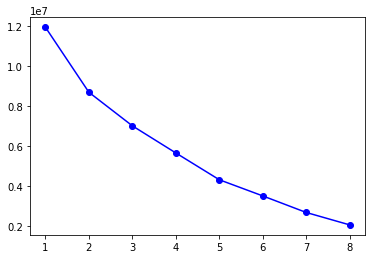

In [19]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')

### **Silhouette coefficient**

In [20]:
from sklearn import metrics

In [21]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=1313)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

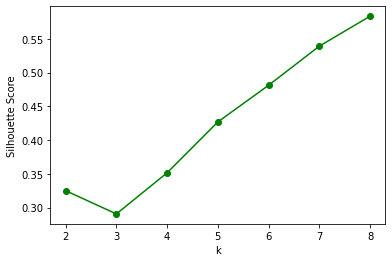

In [22]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('Silhouette Score');